In [ ]:
#DEPRESION a partir de ENDES

# Nueva sección

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:

#2. Crear o cargar el dataset
# Importamos de github
dep = "https://github.com/Leandro-Huayanay/depresion/raw/main/dep.csv" # Changed URL to raw file
df = pd.read_csv(dep) # Use the URL variable
df.head()


,edadc,sexo,educacion,estado_civil,idioma_materno,P1,P2,P3,P4,P5,P6,P7,P8,P9,DEPRESION
0,Adulto_joven,Mujer,Secundaria completa,Conviviente,Español,Para_nada,de_1_a_6_días,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,0
1,joven,Mujer,Secundaria completa,Soltero(a),Español,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,0
2,Adulto_mayor,Mujer,Sin educación,Soltero(a),Español,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,0
3,Adulto_joven,Varón,Secundaria completa,Conviviente,Español,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,0
4,Adulto_joven,Varón,Primaria completa,Conviviente,Otras,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,Para_nada,0


In [ ]:
#3. Codificación de variables categóricas
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded.head()


,edadc,sexo,educacion,estado_civil,idioma_materno,P1,P2,P3,P4,P5,P6,P7,P8,P9,DEPRESION
0,1,0,2,1,1,0,2,0,0,0,0,0,0,0,0
1,3,0,2,4,1,0,0,0,0,0,0,0,0,0,0
2,2,0,4,4,1,0,0,0,0,0,0,0,0,0,0
3,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
#4. Separar variables predictoras y variable objetivo
X = df_encoded.drop('DEPRESION', axis=1)
y = df_encoded['DEPRESION']


In [ ]:
#5. Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [ ]:
# 6. Entrenar modelo de árbol de decisión
model = DecisionTreeClassifier(criterion='entropy', random_state=100)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
#7. Evaluación del modelo
y_pred = model.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))


Confusion Matrix: [[8654   95]
 [ 134  553]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8749
           1       0.85      0.80      0.83       687

    accuracy                           0.98      9436
   macro avg       0.92      0.90      0.91      9436
weighted avg       0.98      0.98      0.98      9436



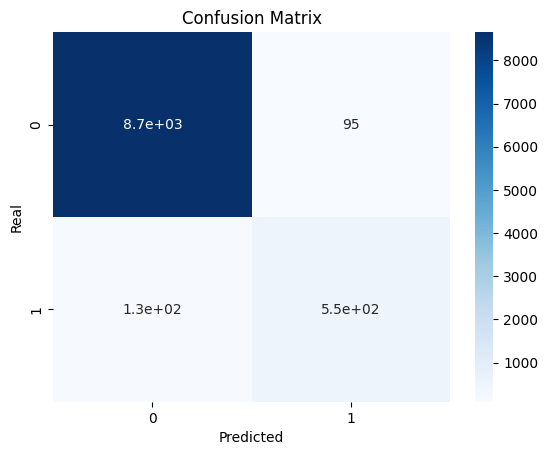

In [ ]:
#8. Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()


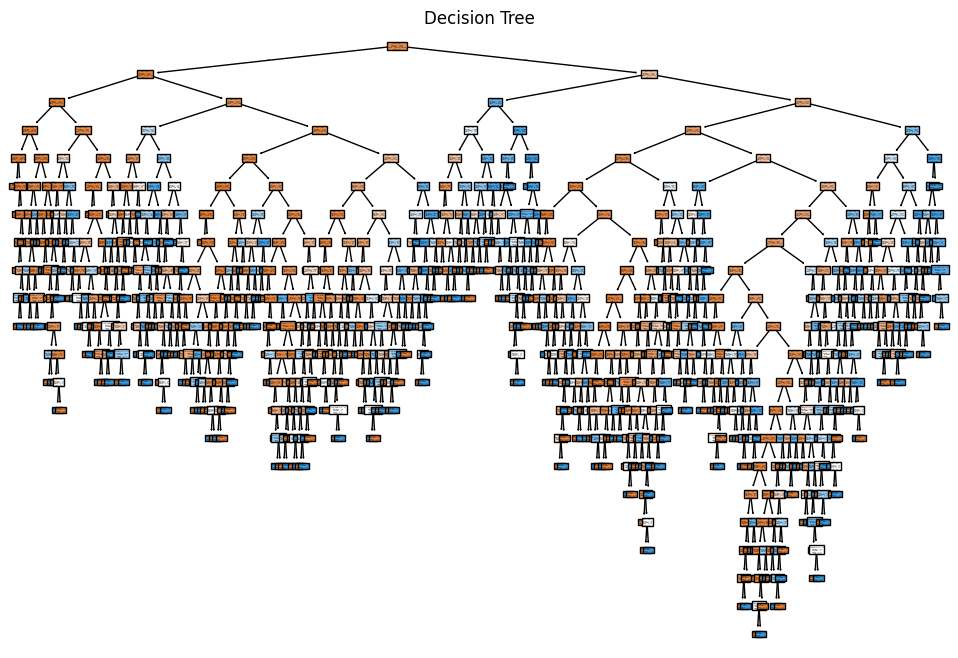

In [ ]:
#9. Visualizar el árbol de decisión
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree")
plt.show()


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9757312420517168


In [ ]:
# [[True Negatives, False Positives],
# [False Negatives, True Positives]]
tn, fp, fn, tp = cm.ravel()
# Precision for the positive class (class 1)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Precision for class 1: {precision}")

Precision for class 1: 0.8533950617283951


In [ ]:
# [[True Negatives, False Positives],
# [False Negatives, True Positives]]
tn, fp, fn, tp = cm.ravel()

# Precision for the positive class (class 1)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Precision for class 1: {precision}")

# Sensibilidad (Recall) para la clase positiva (clase 1)
# La sensibilidad es Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"Recall for class 1: {recall}")

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall) if \
 (precision + recall) > 0 else 0
print(f"F1-score for class 1: {f1_score}")

Precision for class 1: 0.8533950617283951
Recall for class 1: 0.8049490538573508
F1-score for class 1: 0.8284644194756554


In [ ]:
# Calculate F1-score
# [[True Negatives, False Positives],
# [False Negatives, True Positives]]
tn, fp, fn, tp = cm.ravel()

# Precision for the positive class (class 1)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Precision for class 1: {precision}")

# Sensibilidad (Recall) para la clase positiva (clase 1)
# La sensibilidad es Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"Recall for class 1: {recall}")


f1_score = 2 * (precision * recall) / (precision + recall) if \
 (precision + recall) > 0 else 0
print(f"F1-score for class 1: {f1_score}")

Precision for class 1: 0.8533950617283951
Recall for class 1: 0.8049490538573508
F1-score for class 1: 0.8284644194756554


In [ ]:
import joblib
joblib.dump(model, 'depresion_tree_model.pkl')


['depresion_tree_model.pkl']

In [ ]:
# Cargar modelo
model_loaded = joblib.load('depresion_tree_model.pkl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')